In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 1 (70-15-15).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,18,20,0,32,0,8,98.4,53.3,109,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,10,19,5,39,7,5,90.8,53.0,108,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,38,28,6,30,0,0,89.5,53.4,106,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,25,22,8,45,0,8,82.6,56.4,106,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,16,22,5,47,0,9,79.8,57.2,106,Train


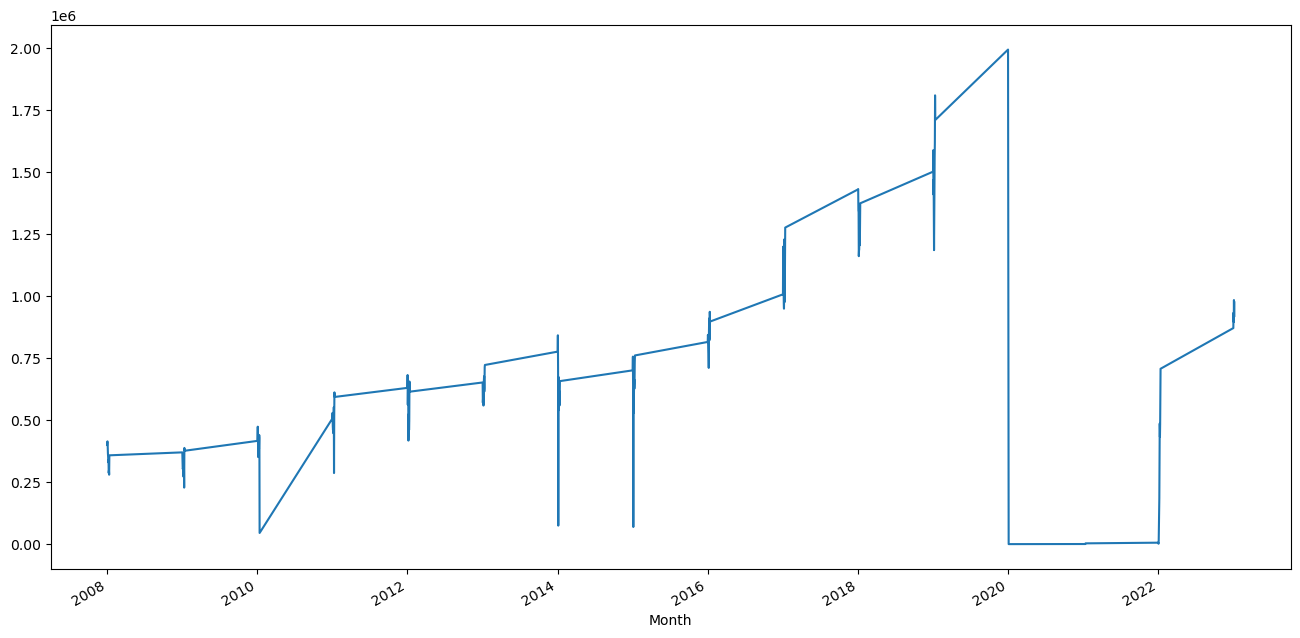

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Month                                                              
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Month                                         

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.12 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.33 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.04 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.13 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.05 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18100D+01    |proj g|=  3.92673D-05

At iterate    5    f=  1.18100D+01    |proj g|=  1.28713D-03

At iterate   10    f=  1.18088D+01    |proj g|=  1.89752D-02

At iterate   15    f=  1.18068D+01    |proj g|=  2.68775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   26     17     28      1     0     0   1.933D-05   1.181D+01
  F =   11.806845326123231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1582.117
Date:                            Wed, 23 Aug 2023   AIC                           3216.235
Time:                                    21:38:20   BIC                           3288.925
Sample:                                         0   HQIC                          3245.757
                                            - 134                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts            64.9903    431.405      0.151      0.880    -780.547     910.528
Number of Comments         24.7977     45.843      0.541      0.589     -65.053     114.648
Airbnb Vietnam           -538.2921   2699.452     -0.199      0.842   -5829.121    4752.537
Vietnam restaurant       4232.8068   2935.360      1.442      0.149   -1520.393    9986.006
Shopping in Hanoi        -304.0118   3273.954     -0.093      0.926   -6720.843    6112.820
Shopping in Ho Chi Minh   328.0043   3397.840      0.097      0.923   -6331.640    6987.648
 Vietnam tour            1071.3331   4795.849      0.223      0.823   -8328.357    1.05e+04
 Skyscanner              2194.7533   7389.990      0.297      0.766   -1.23e+04    1.67e+04
 Vietnam visa            2265.1845   4426.485      0.512      0.609   -6410.566    1.09e+04
 Vietnam airport         -135.3270   3886.625     -0.035      0.972   -7752.972    7482.318
 Vietnam flights           54.2440   4429.677      0.012      0.990   -8627.762    8736.250
 Danang airport          -245.2619   2620.128     -0.094      0.925   -5380.619    4890.095
 Hoi An                 -2853.0175   2458.180     -1.161      0.246   -7670.961    1964.926
 Vietnam weather         -683.7718   2263.480     -0.302      0.763   -5120.112    3752.568
 Visa for Vietnam         335.3144   4443.519      0.075      0.940   -8373.823    9044.452
 Sgn airport              954.6272   2578.528      0.370      0.711   -4099.194    6008.448
 Phu Quoc                2889.1349   2490.843      1.160      0.246   -1992.828    7771.098
 Vietnam itinerary      -2776.6689   2887.076     -0.962      0.336   -8435.233    2881.895
 Vietnam trip            3081.9235   2277.932      1.353      0.176   -1382.742    7546.589
 Things to do in Hue     2324.4093   3782.803      0.614      0.539   -5089.749    9738.567
 Vietnam backpackers    -5738.6352   3452.601     -1.662      0.096   -1.25e+04    1028.339
CCI                     -5592.9400   4886.586     -1.145      0.252   -1.52e+04    3984.593
PMI                      -1.03e+04   1.08e+04     -0.956      0.339   -3.14e+04    1.08e+04
REERI                   -6819.0939   1.09e+04     -0.626      0.531   -2.82e+04    1.45e+04
ar.S.L12                    0.4306      0.089      4.814      0.000       0.255       0.606
sigma2                   1.342e+10      0.013   9.98e+11      0.000    1.34e+10    1.34e+10
===================================================================================
Ljung-Box (L1) (Q):                  11.44   Jarque-Bera (JB):               150.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.30
Prob(H) (two-sided):                  0.31   Kurtosis:                         8.43
=============================================

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1163011.8562915856


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1041242.971773183


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.1651977016794135e+21


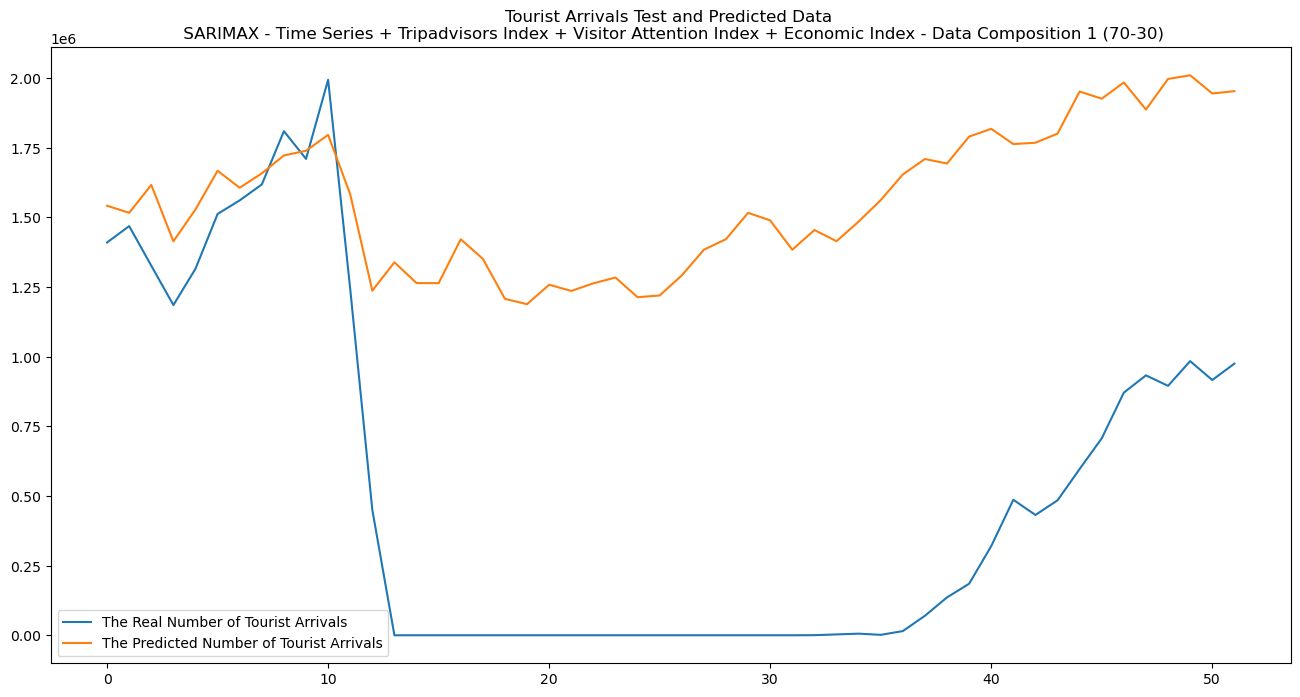

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index + Economic Index - Data Composition 1 (70-30)")
plt.legend()
plt.show()